In [67]:
#Importing excel file into Dataframe
import pandas as pd
url = r"C:\Users\param\Downloads\638234264281445962.xlsx"
df = pd.read_excel(url)
print(df.shape)

c:\Users\param\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


(2596, 51)


In [68]:
#Printing column names
print(df.columns)

Index(['Shipment ID', 'Order ID', 'Store Name', 'Order Number', 'Order Date',
       'Order Total', 'Date Paid', 'Amount Paid', 'Shipping Paid', 'Ship Name',
       'Ship Company', 'Ship Street 1', 'Ship Street 2', 'Ship City',
       'Ship State', 'Ship Postal Code', 'Ship Country', 'Ship Phone',
       'Buyer Email', 'Buyer Notified', 'Buyer User ID',
       'Marketplace Notified', 'Ship Date', 'Qty Shipped', 'Warehouse',
       'Carrier', 'Carrier Fee', 'Carrier Transaction', 'Shipping Service',
       'Tracking Number', 'Label Create Date', 'Label Message', 'Batch ID',
       'Label Voided', 'Void Date', 'Weight Oz', 'Weight', 'Package Width',
       'Package Height', 'Package Length', 'Package Type', 'Confirmation',
       'Insured', 'Insurance Cost', 'Insurance Provider',
       'Insurance Transaction', 'Insured Value', 'Insurance Voided',
       'TaxAmount', 'Created By', 'Zone'],
      dtype='object')


In [69]:
#Determining the number of null values for each column 
print(df.isna().sum())

Shipment ID                 1
Order ID                    1
Store Name                  1
Order Number               32
Order Date                  1
Order Total                 1
Date Paid                  37
Amount Paid                 1
Shipping Paid               1
Ship Name                   8
Ship Company             2518
Ship Street 1               1
Ship Street 2            2519
Ship City                   1
Ship State                  3
Ship Postal Code            1
Ship Country                1
Ship Phone                 12
Buyer Email                41
Buyer Notified              1
Buyer User ID              32
Marketplace Notified        1
Ship Date                   1
Qty Shipped                 1
Warehouse                   1
Carrier                     1
Carrier Fee                 1
Carrier Transaction         1
Shipping Service            1
Tracking Number             1
Label Create Date           1
Label Message            2596
Batch ID                    1
Label Void

In [70]:
#Deleting unwanted columns 
df.drop('Ship Company',axis = 1 , inplace  = True)
df.drop('Ship Street 2',axis = 1 , inplace = True)
df.drop('Label Message',axis = 1 , inplace  = True)
df.drop('Void Date',axis = 1 , inplace = True)
df.drop('Insurance Cost',axis = 1 , inplace  = True)
df.drop('Insurance Provider',axis = 1 , inplace = True)
df.drop('Insurance Transaction',axis = 1 , inplace = True)

print(df.shape)

(2596, 44)


In [71]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Shipment ID           2595 non-null   float64       
 1   Order ID              2595 non-null   float64       
 2   Store Name            2595 non-null   object        
 3   Order Number          2564 non-null   object        
 4   Order Date            2595 non-null   datetime64[ns]
 5   Order Total           2595 non-null   float64       
 6   Date Paid             2559 non-null   datetime64[ns]
 7   Amount Paid           2595 non-null   float64       
 8   Shipping Paid         2595 non-null   float64       
 9   Ship Name             2588 non-null   object        
 10  Ship Street 1         2595 non-null   object        
 11  Ship City             2595 non-null   object        
 12  Ship State            2593 non-null   object        
 13  Ship Postal Code  

In [72]:
#
print(df['Order Total'].max())
print(df['Order Total'].min())
print(df['Order Total'].mean())

709.89
0.0
99.00274759152217


In [73]:
#Most frequently used Ship Name 
print(df['Ship Name'].mode()[0])

REDACTED (Amazon)


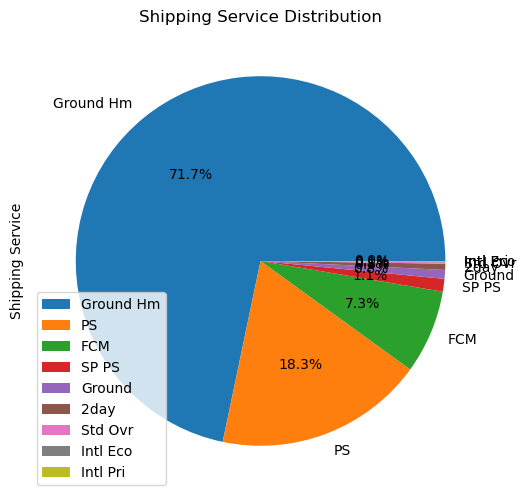

In [74]:
#Analyzing Shipping Service Distribution
import matplotlib.pyplot as plt
service_count = df['Shipping Service'].value_counts().astype(int)
plt.figure(figsize=(10 , 6)) 
service_count.plot(kind = 'pie',autopct='%1.1f%%')
plt.title('Shipping Service Distribution')
plt.legend(labels=service_count.index, loc='lower left')
plt.show()



In [75]:
print(df['Ship Country'].unique())
print(df['Store Name'].unique())

[nan 'US' 'CA' 'FR' 'SG' 'BR']
[nan 'Manual Orders' 'Genius Litter' 'Rate Browser' 'Alpha Paw Wholesale'
 'Alpha Paw Amazon' 'Alpha Paw - Walmart' 'Smiling Paws Pet - Amazon']


In [76]:
order_counts = df.groupby('Ship Country')['Order ID'].sum().round()
print(order_counts)

Ship Country
BR    5.914843e+08
CA    4.118888e+09
FR    5.857519e+08
SG    5.868595e+08
US    1.523297e+12
Name: Order ID, dtype: float64


In [77]:
#tax paid by states 
tax_paid = df.groupby('Ship State')['TaxAmount'].sum().sort_values(ascending=False)
print(tax_paid)

Ship State
CA              2863.26
TX              1806.30
FL              1276.25
NY              1096.61
IL               932.47
WA               569.36
AZ               558.65
NJ               514.74
PA               503.51
NC               487.94
GA               474.46
OH               441.12
CO               432.75
MA               387.54
TN               384.54
MI               381.92
VA               333.83
SC               328.08
LA               315.34
IN               312.28
MN               303.48
MD               278.12
OK               234.32
NV               223.95
KS               222.27
AR               212.55
CT               208.88
WI               157.44
UT               139.37
NM               121.55
IA               121.47
KY               117.85
RI                84.66
ID                77.49
WV                72.07
NE                65.49
ME                64.26
HI                50.14
DC                41.91
VT                36.29
SD                16.52
AL   

In [78]:
#Orders placed per day
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date'] = df['Order Date'].dt.date
orders_placed = df.groupby('Order Date')['Order ID'].count()
print(orders_placed)


Order Date
2023-04-28     18
2023-04-29     56
2023-04-30     65
2023-05-01     82
2023-05-02    111
2023-05-03     60
2023-05-04     74
2023-05-05     52
2023-05-06     77
2023-05-07     62
2023-05-08     80
2023-05-09     66
2023-05-10     55
2023-05-11     47
2023-05-12     96
2023-05-13     77
2023-05-14     66
2023-05-15    112
2023-05-16     70
2023-05-17     65
2023-05-18     62
2023-05-19     64
2023-05-20     51
2023-05-21     69
2023-05-22     99
2023-05-23    103
2023-05-24      5
2023-05-25    200
2023-05-26     95
2023-05-27     96
2023-05-28     75
2023-05-29     89
2023-05-30    127
2023-05-31     69
Name: Order ID, dtype: int64


In [79]:
#Grouping each state with each shipping service they use individually
ship_serv = df.groupby(['Ship State', 'Shipping Service']).size()
print(ship_serv)


Ship State  Shipping Service
AB          Ground              1
AK          FCM                 1
            Ground Hm           3
            PS                  2
AL          FCM                 4
                               ..
WI          PS                  7
WV          FCM                 3
            Ground Hm           6
            PS                  3
            SP PS               1
Length: 179, dtype: int64


In [80]:
#Determining the total tax paid on total number of orders 
print(df['Order ID'].count())
print(df['Order Total'].sum())
print(df['TaxAmount'].sum())

2595
256912.13
17256.64


In [81]:
#Determining the store name used by each country 
store_name1 = df.groupby(['Ship Country','Store Name']).size()
print(store_name1)

Ship Country  Store Name               
BR            Rate Browser                    1
CA            Manual Orders                   7
FR            Manual Orders                   1
SG            Manual Orders                   1
US            Alpha Paw - Walmart             1
              Alpha Paw Amazon               51
              Alpha Paw Wholesale            11
              Genius Litter                  34
              Manual Orders                2457
              Rate Browser                   30
              Smiling Paws Pet - Amazon       1
dtype: int64


In [82]:
#determining the store name used by each state 
store_name2 = df.groupby(['Ship State' , 'Store Name']).size()
print(store_name2)

Ship State  Store Name      
AB          Manual Orders        1
AK          Genius Litter        1
            Manual Orders        5
AL          Alpha Paw Amazon     1
            Genius Litter        2
                                ..
WA          Rate Browser         1
WI          Genius Litter        1
            Manual Orders       30
            Rate Browser         1
WV          Manual Orders       13
Length: 127, dtype: int64


In [83]:
print(df['Carrier'].value_counts())


FedEx    1930
USPS      665
Name: Carrier, dtype: int64


In [84]:
import pandas as pd

result = df.groupby(['Ship State','Carrier']).agg({'Carrier Fee': ['mean', 'min', 'max']})

result = result.reset_index()

print(result)


    Ship State Carrier Carrier Fee               
                              mean    min     max
0           AB   FedEx   27.570000  27.57   27.57
1           AK   FedEx  128.236667  95.87  192.56
2           AK    USPS   10.670000   4.44   15.03
3           AL   FedEx   17.759722  11.95   36.62
4           AL    USPS    9.070000   3.97   11.63
..         ...     ...         ...    ...     ...
97          WA    USPS    7.636667   3.81   10.11
98          WI   FedEx   17.279524  11.90   28.56
99          WI    USPS    8.789091   4.31   11.63
100         WV   FedEx   17.735714  12.98   30.30
101         WV    USPS    8.216667   4.13   12.25

[102 rows x 5 columns]


In [85]:
#Finding the volume of each package 
df['Package Volume'] = df['Package Height'] * df['Package Length']* df['Package Width']
print(df['Package Volume'])

0          NaN
1       3024.0
2       3024.0
3       3024.0
4       3024.0
         ...  
2591    3024.0
2592    3024.0
2593     280.0
2594    1536.0
2595    1536.0
Name: Package Volume, Length: 2596, dtype: float64


In [86]:
print(df[['Ship State','Order Total','Amount Paid']])

     Ship State  Order Total  Amount Paid
0           NaN          NaN          NaN
1            GA       158.54       128.74
2            NC         8.34       127.54
3            OK        10.63       132.21
4            CA       159.43       129.63
...         ...          ...          ...
2591         CA         9.24       128.44
2592         WI       155.56       125.76
2593         IL        94.87        77.07
2594         NC        51.35        51.35
2595         VA        39.02       152.22

[2596 rows x 3 columns]


In [87]:
print(df['Order Total'].mean())
print(df['Amount Paid'].mean())

99.00274759152217
103.57469364161851


In [88]:
mylist = []
for i in df.index:
    if df.loc[i, 'Amount Paid'] < df.loc[i, 'Order Total']:
        mylist.append(df.loc[i, 'Ship State'])
print(mylist)


['GA', 'CA', 'FL', 'PA', 'FL', 'NC', 'NJ', 'NJ', 'FL', 'CA', 'NV', 'NJ', 'IL', 'WI', 'SC', 'PA', 'OK', 'AL', 'CO', 'IN', 'OH', 'SC', 'SC', 'NC', 'AL', 'AZ', 'PA', 'CT', 'NJ', 'FL', 'CA', 'CA', 'CA', 'CA', 'FL', 'ID', 'FL', 'CO', 'CA', 'CA', 'IL', 'IL', 'WA', 'OR', 'FL', 'OH', 'NJ', 'OR', 'MT', 'FL', 'PA', 'MA', 'IL', 'MA', 'CA', 'IL', 'MN', 'NY', 'MO', 'NJ', 'OH', 'NJ', 'MD', 'TX', 'FL', 'ID', 'MI', 'AL', 'TX', 'NY', 'AZ', 'GA', 'FL', 'PA', 'WA', 'IL', 'CA', 'CA', 'CA', 'CA', 'TX', 'FL', 'FL', 'CT', 'AZ', 'IL', 'NJ', 'FL', 'NH', 'FL', 'CA', 'OR', 'MI', 'FL', 'TX', 'MI', 'MA', 'MO', 'CA', 'PA', 'UT', 'MN', 'CA', 'OH', 'NC', 'PA', 'MD', 'ME', 'NY', 'LA', 'NC', 'AZ', 'CT', 'FL', 'TN', 'NJ', 'IL', 'ME', 'GA', 'WA', 'OR', 'NY', 'TX', 'AZ', 'CA', 'TN', 'IN', 'MA', 'TX', 'NJ', 'CA', 'RI', 'CA', 'AR', 'PA', 'CA', 'PA', 'SC', 'NV', 'TX', 'TX', 'MA', 'CA', 'MI', 'TX', 'IN', 'MN', 'NC', 'WV', 'CA', 'NJ', 'NJ', 'PA', 'OH', 'MA', 'MO', 'AR', 'WA', 'CA', 'MI', 'CA', 'AZ', 'MD', 'VT', 'WI', 'TX', 'CA

In [89]:

state_avg_paid = df.groupby('Ship State')['Amount Paid'].transform('mean')
state_avg_total = df.groupby('Ship State')['Order Total'].transform('mean')


highest_state = df.loc[state_avg_paid > state_avg_total, 'Ship State'].unique()

lowest_state = df.loc[state_avg_paid < state_avg_total, 'Ship State'].unique()

print("high amount paying", highest_state)
print("low amount paying", lowest_state)


high amount paying ['GA' 'NC' 'CA' 'FL' 'IN' 'NV' 'NE' 'MD' 'SC' 'MA' 'NY' 'AL' 'TX' 'AZ'
 'AR' 'MT' 'UT' 'MI' 'LA' 'RI' 'VA' 'ME' 'WV' 'ND' 'AB' 'MS' 'KS' 'KY'
 'AK' 'DC' 'BC' 'ON']
low amount paying ['OK' 'PA' 'NJ' 'CT' 'OR' 'IL' 'WI' 'MO' 'CO' 'OH' 'ID' 'WA' 'MN' 'NH'
 'NM' 'TN' 'IA' 'VT' 'SD' 'DE' 'HI' 'QC']


In [90]:
import pandas as pd

# Assuming you have already imported pandas and assigned your DataFrame to the variable df

df['Order Date'] = pd.to_datetime(df['Order Date'])  # Convert 'Order Date' column to datetime format

print(df['Order Date'].min())
print(df['Order Date'].max())


2023-04-28 00:00:00
2023-05-31 00:00:00


In [96]:
import pandas as pd 
url1 = r"C:\Users\param\Downloads\638234264281445962.xlsx"
url2 = r"C:\Users\param\Downloads\orders_export_1\orders_export_1.csv"
df1 = pd.read_excel(url1)
df2 = pd.read_csv(url2)
c
print(master_df.head(5))



c:\Users\param\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [1]:
mylist = []
for i in df1["Order Number"]:
    for j in df2["Name"]:
        if i == j :

            mylist.append(i)
print(mylist)
            
print(master_df)

NameError: name 'df1' is not defined